In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mne
from time import time
from mne.preprocessing import ICA



Extracting EDF parameters from /Users/tomjefferis/Documents/PhD/Ryans Study/1_normal.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1320959  =      0.000 ...   645.000 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 48 - 52 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 48.00
- Lower transition bandwidth: 12.00 Hz (-6 dB cutoff frequency: 42.00 Hz)
- Upper passband edge: 52.00 Hz
- Upper transition bandwidth: 13.00 Hz (-6 dB cutoff frequency: 58.50 Hz)
- Filter length: 565 samples (0.276 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Win

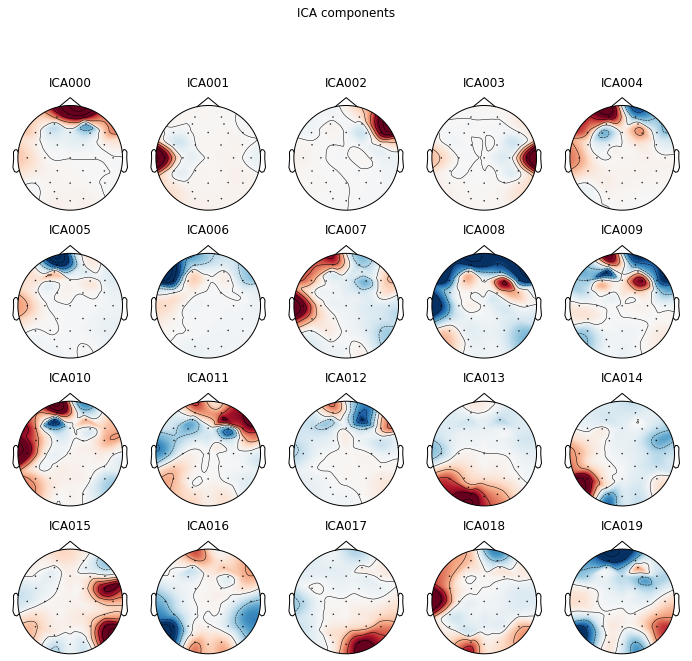

[<Figure size 702x678.24 with 20 Axes>]

In [25]:
raw = mne.io.read_raw_bdf("1_normal.bdf")
raw.load_data()
eeg_channels = mne.pick_types(raw.info)
raw.drop_channels(ch_names=["LEOG", "REOG","A1","A2","EXG7","EXG8",'GSR1', 'GSR2', 'Erg1', 'Erg2', 'Resp', 'Plet', 'Temp', 'Status','Po4','UEOG', 'DEOG'])
raw = raw.filter(48,52)
raw = raw.filter(0.1, 40.)
raw.set_montage(mne.channels.make_standard_montage('biosemi32'))
ica = ICA(n_components=20, max_iter=5000, random_state=97)
ica.fit(raw)
ica.plot_components()